
# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', 999)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model

# Importing Data

In [2]:
data = pd.read_csv("/Users/yashbajoria/Downloads/436025-853067-bundle-archive/bank-additional-full.csv", sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Descriptive Analysis

In [3]:
data.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
data.duplicated().sum()

12

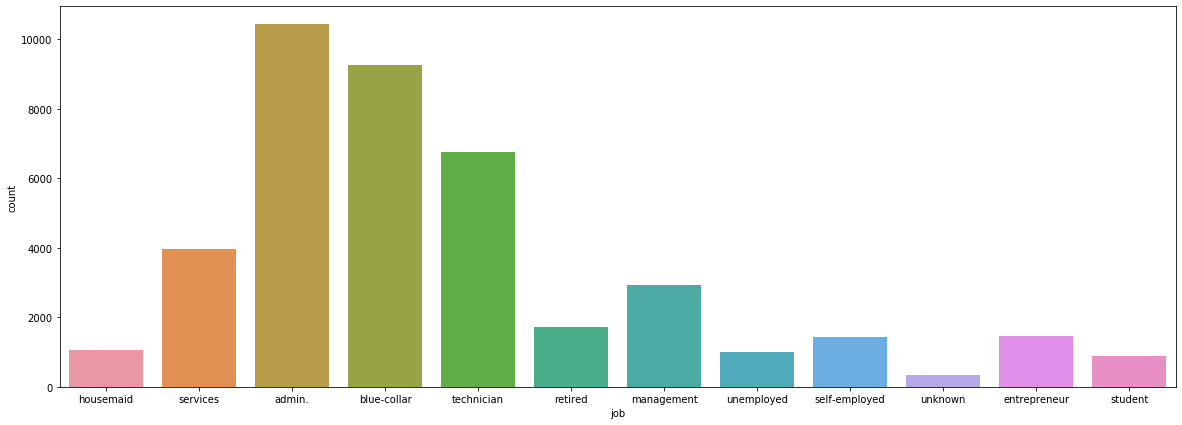

In [5]:
rcParams['figure.figsize'] = 20,7
sns.countplot(x=data['job'])

**We see customer in the tele marketing campaign data are commonly working administrative and blue collar type of job**

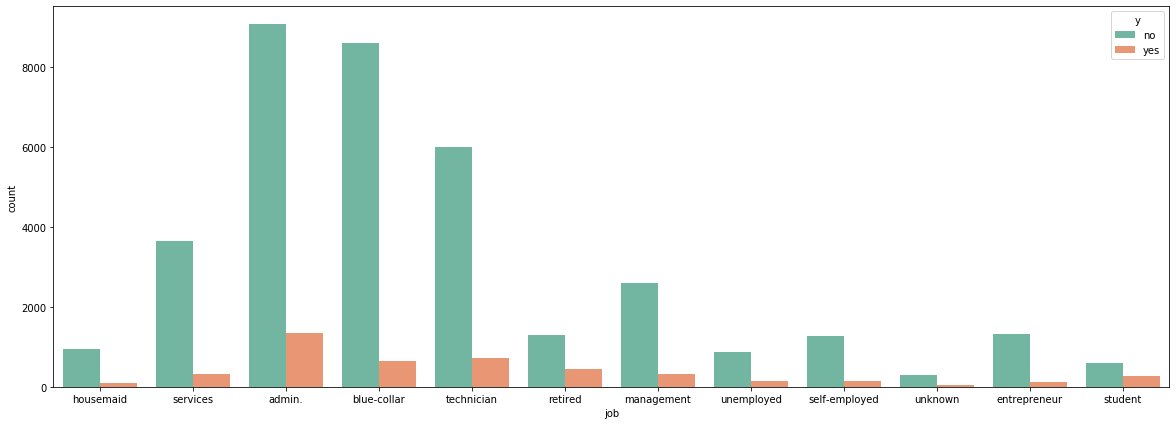

In [6]:
rcParams['figure.figsize'] = 20,7
sns.countplot(x=data['job'],hue=data['y'],palette="Set2")

**We see student subscribing for term deposit is more likely as compared to other job type.Difference between subscribed and unsubscribed customers in other job type is higher.**

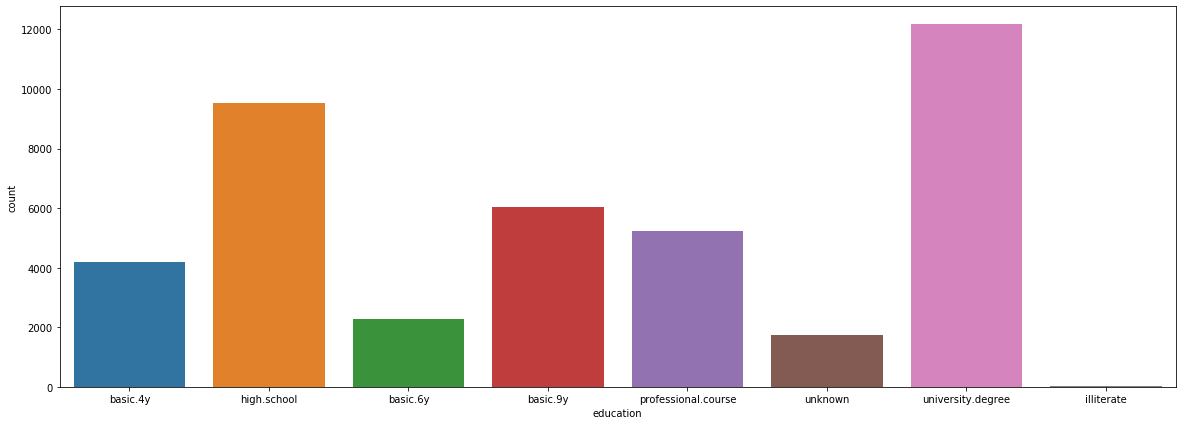

In [7]:
sns.countplot(x=data['education'])

**Here customers data we have are mostly having university degree or high school diploma**

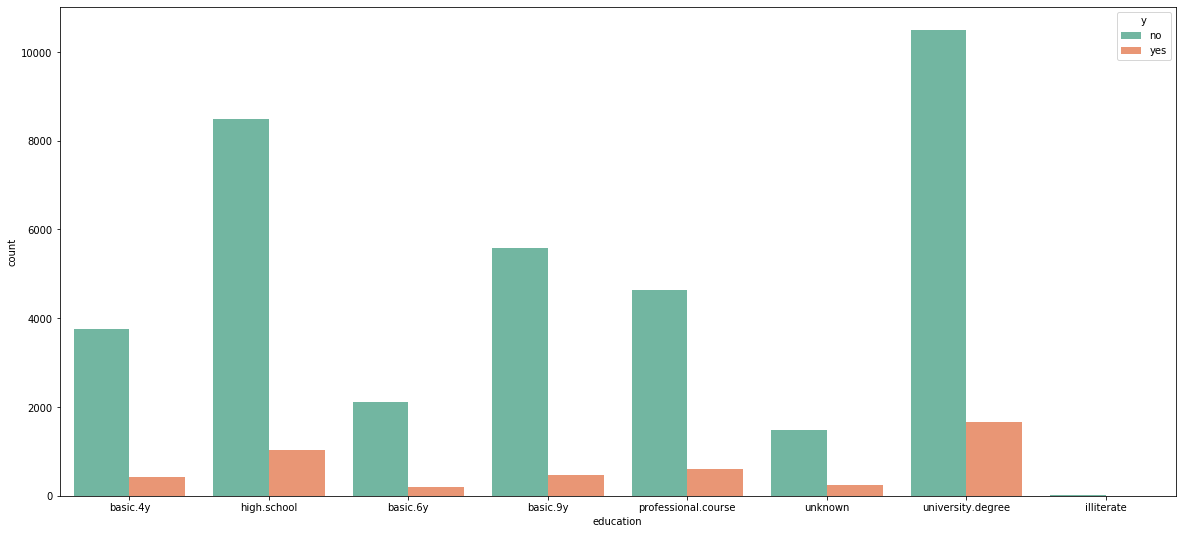

In [8]:
rcParams['figure.figsize'] = 20,9
sns.countplot(x=data['education'],hue=data['y'],palette="Set2")

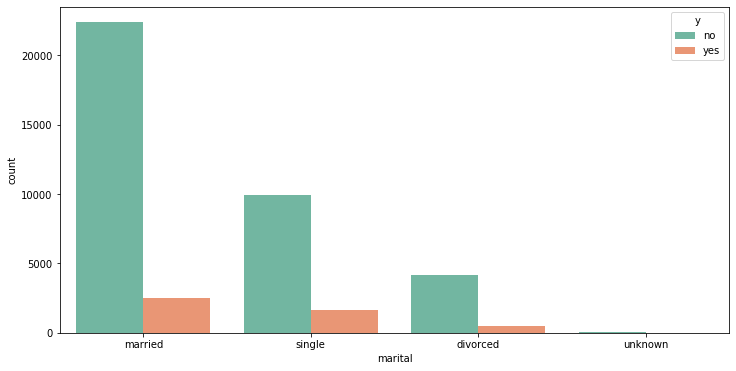

In [9]:
rcParams['figure.figsize'] = 12,6
sns.countplot(x=data['marital'],hue=data['y'],palette="Set2")

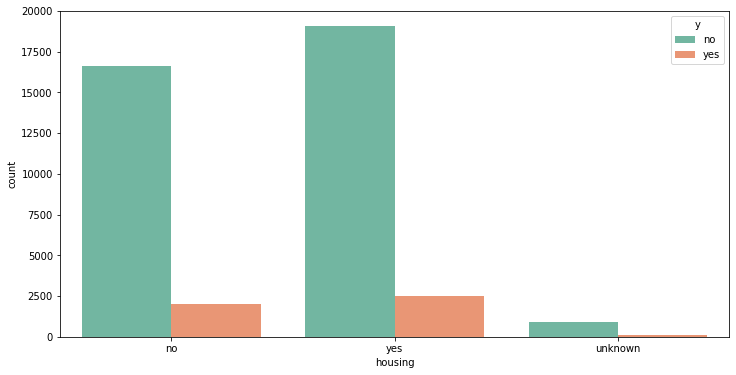

In [10]:
rcParams['figure.figsize'] = 12,6
sns.countplot(x=data['housing'],hue=data['y'],palette="Set2")

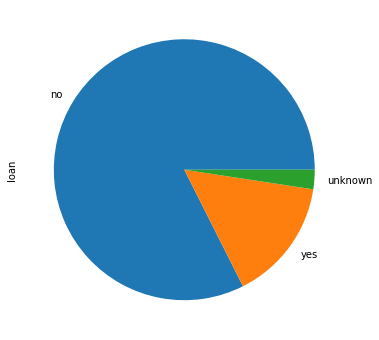

In [11]:
data['loan'].value_counts().plot(kind="pie")

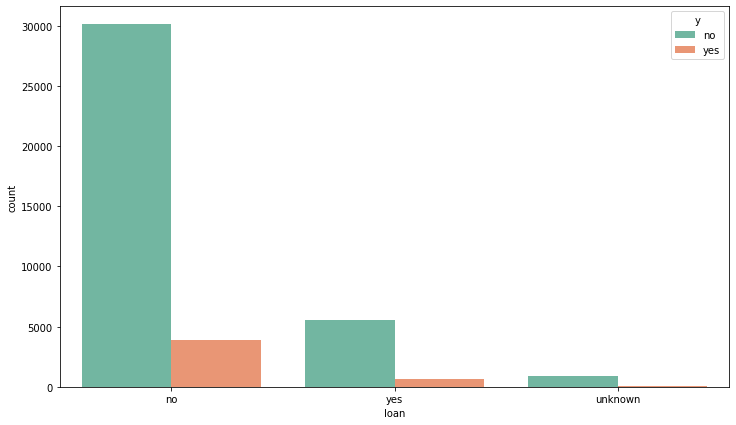

In [12]:
rcParams['figure.figsize'] = 12,7
sns.countplot(x=data['loan'],hue=data['y'],palette="Set2")

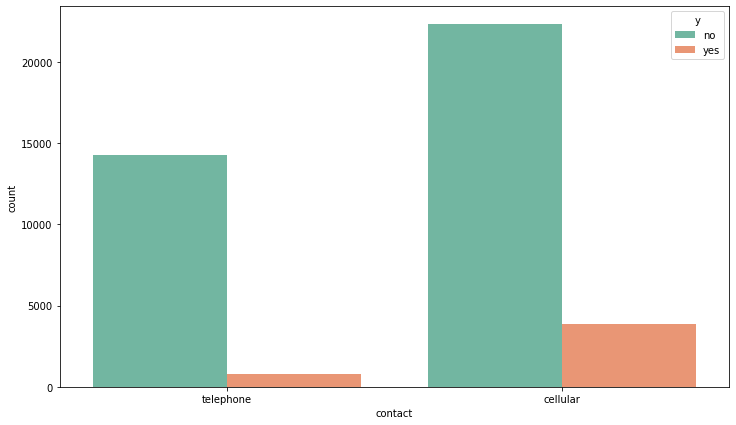

In [13]:
rcParams['figure.figsize'] = 12,7
sns.countplot(x=data['contact'],hue=data['y'],palette="Set2")

**More Customers are subscribing for Term deposit through cellular media than telephone**

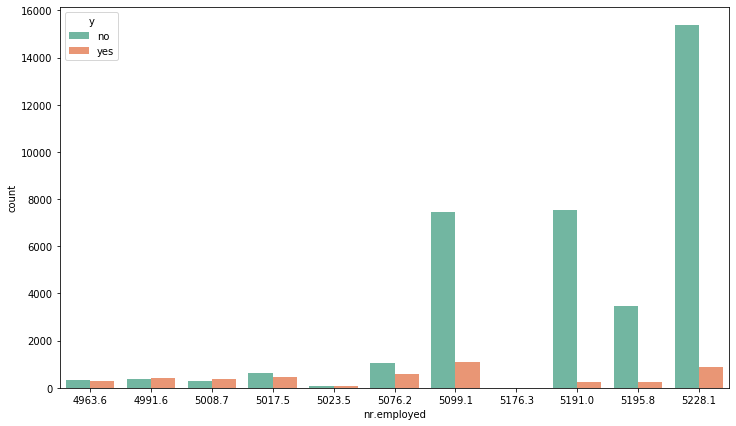

In [14]:
rcParams['figure.figsize'] = 12,7
sns.countplot(x=data['nr.employed'],hue=data['y'],palette="Set2")

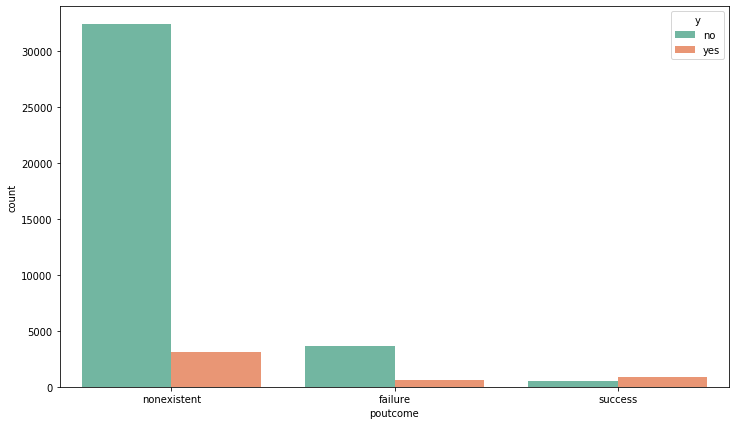

In [15]:
rcParams['figure.figsize'] = 12,7
sns.countplot(x=data['poutcome'],hue=data['y'],palette="Set2")

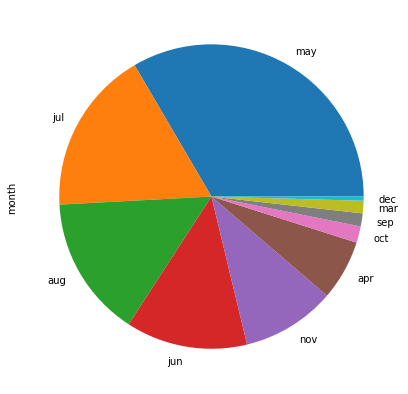

In [16]:
data['month'].value_counts().plot(kind="pie")

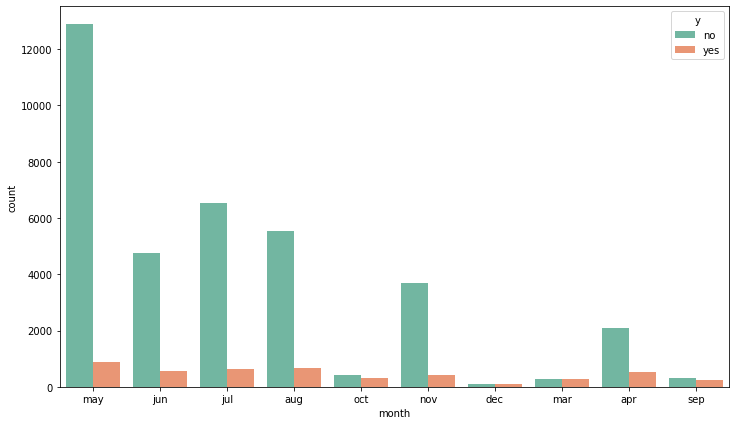

In [17]:
rcParams['figure.figsize'] = 12,7
sns.countplot(x=data['month'],hue=data['y'],palette="Set2")

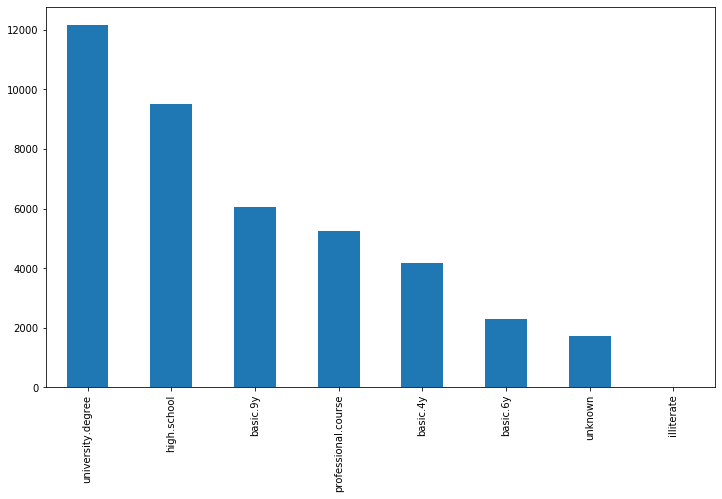

In [18]:
data["education"].value_counts().plot(kind="bar")

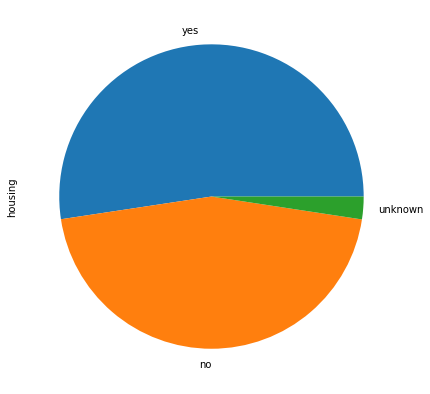

In [19]:
data["housing"].value_counts().plot(kind="pie")

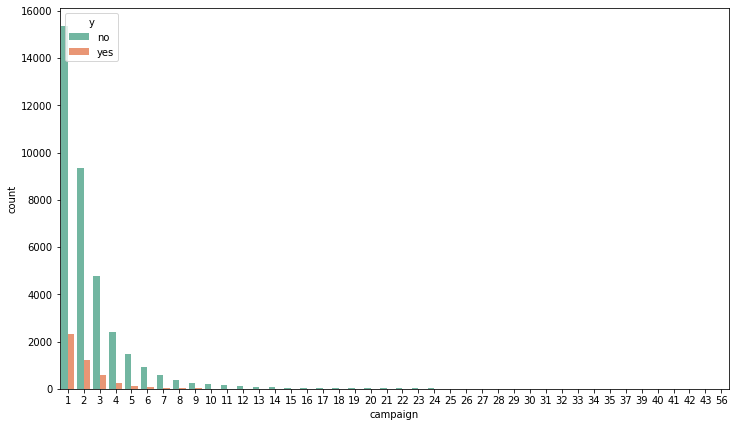

In [20]:
rcParams['figure.figsize'] = 12,7
sns.countplot(data['campaign'],hue=data['y'],palette="Set2")

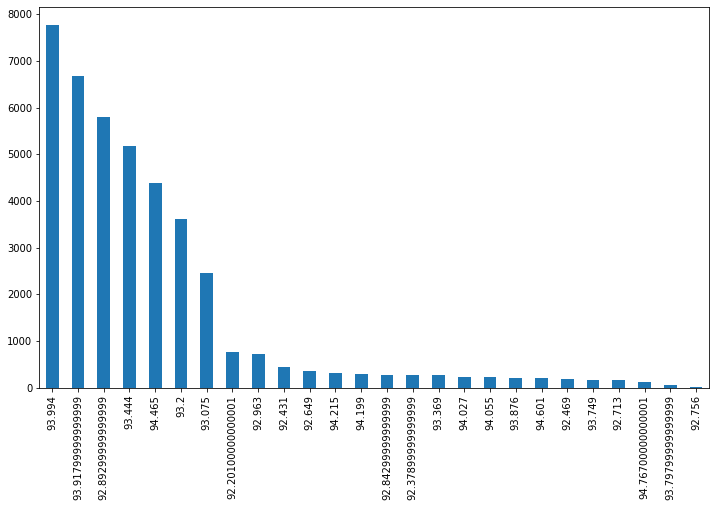

In [21]:
data['cons.price.idx'].value_counts().plot(kind="bar")

# Encoding Categorical Variable

In [22]:
le = preprocessing.LabelEncoder()

for column in data[['job', 'marital','education','housing','loan','contact','month','day_of_week','poutcome','default','y']]:
    le.fit(data[column])
    data[column] = le.transform(data[column])


data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


**Correlation Matrix**

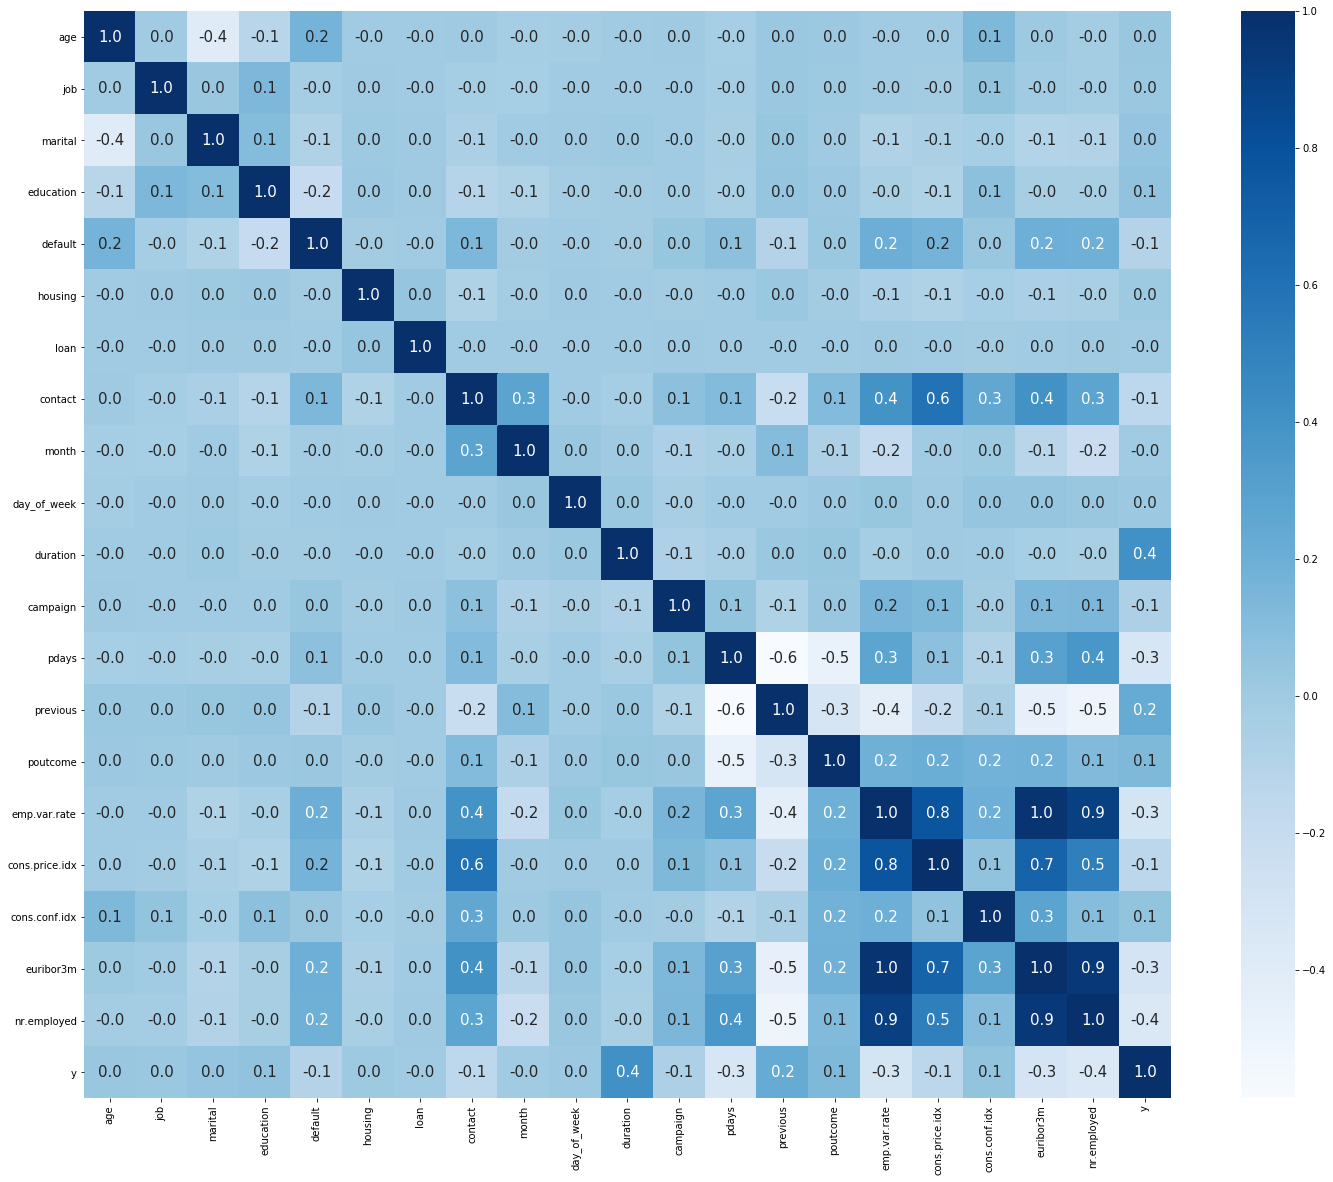

In [23]:
corrmatrix = data.corr()
rcParams['figure.figsize'] = 25,20
sns.heatmap(corrmatrix, cbar=True, square= True,fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')

# Training Machine Learning Model

In [24]:
y = data['y']
x = data.drop(['y'],axis=1)

In [25]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.10, random_state=42)

In [26]:
from sklearn import ensemble
from sklearn import metrics
RFC = ensemble.RandomForestClassifier()

In [27]:
RFC.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
y_pred_rfc = RFC.predict(X_test)

# Evaluating Model on test data

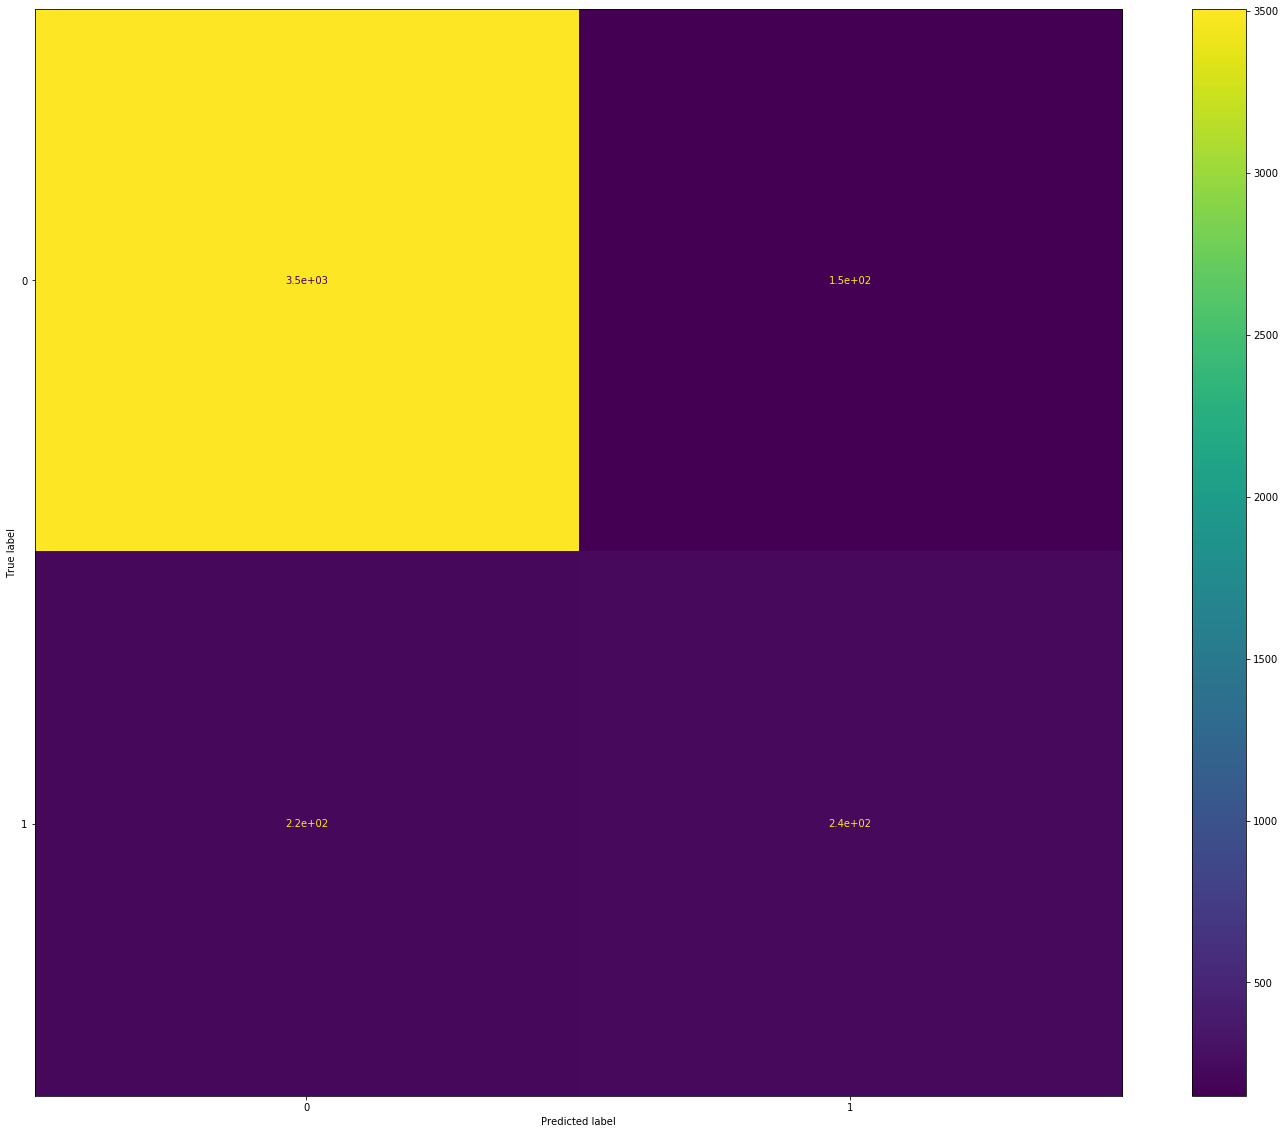

In [29]:
f1_rfc = metrics.f1_score(y_true=y_test,y_pred=y_pred_rfc)
acc_rfc = metrics.accuracy_score(y_true=y_test,y_pred=y_pred_rfc)
pres_rfc = metrics.precision_score(y_true=y_test,y_pred=y_pred_rfc)
recall_rfc = metrics.recall_score(y_true=y_test,y_pred=y_pred_rfc)
cfn_matrix = metrics.plot_confusion_matrix(RFC,X_test,y_test)

In [30]:
print("The accuracy of the model RandomForestClassifier Model",acc_rfc)
print("The F1 Score of the model RandomForestClassifier Model",f1_rfc)
print("The Precision of the model RandomForestClassifier Model",pres_rfc)
print("The recall of the model RandomForestClassifier",recall_rfc)


The accuracy of the model RandomForestClassifier Model 0.9089584850691915
The F1 Score of the model RandomForestClassifier Model 0.5583038869257951
The Precision of the model RandomForestClassifier Model 0.6124031007751938
The recall of the model RandomForestClassifier 0.512987012987013


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3657
           1       0.61      0.51      0.56       462

    accuracy                           0.91      4119
   macro avg       0.78      0.74      0.75      4119
weighted avg       0.90      0.91      0.91      4119



**Feature Importance Score for each feature**

In [33]:
print ('What is the importance of each feature for Random Forest Classifier?')
for feat in zip(x,RFC.feature_importances_):
    print (feat)

What is the importance of each feature for Random Forest Classifier?
('age', 0.09143531552164193)
('job', 0.04785271272886699)
('marital', 0.02377462232301844)
('education', 0.04300724905909505)
('default', 0.008765545246607609)
('housing', 0.020266775691078702)
('loan', 0.015015102199716376)
('contact', 0.00999788157299111)
('month', 0.017922154900645176)
('day_of_week', 0.03964310473413643)
('duration', 0.32128949060136924)
('campaign', 0.04219921910001151)
('pdays', 0.03398733018859236)
('previous', 0.012536286308907586)
('poutcome', 0.025482074070010387)
('emp.var.rate', 0.022830381447930467)
('cons.price.idx', 0.022703711914462837)
('cons.conf.idx', 0.027721299841241664)
('euribor3m', 0.11563888159409812)
('nr.employed', 0.05793086095557811)
